# Decision Trees und Random Forests mit Python

Dieses Notebook zeigt den Code zur Video-Lektion über Entscheidugnsbäume mit Python. Für die ausführlichen Erklärungen zum Code schaut bitte ins Video. 

## Libraries importieren

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Die Daten laden

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## Explorative Daten Analyse

Wir schauen uns ein einfaches Pairplot für diesen kleinen Datensatz an.

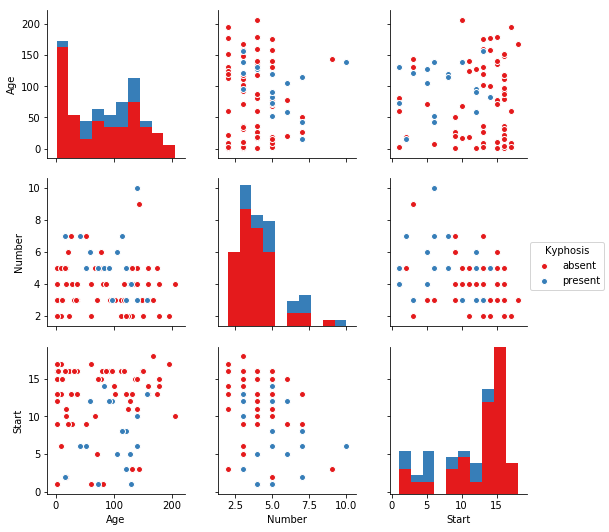

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

# Train Test Split

Fahren wir damit fort unsere Daten in Trainings- und Testset aufzuteilen:

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Trees (Entscheidungsbäume)

Wir beginnen damit einen einzelnen Entscheidungsbaum zu trainieren:

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

## Vorhersage und Auswertung

Lasst uns den Entscheidungsbaum auswerten.

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

     absent       0.65      0.81      0.72        16
    present       0.40      0.22      0.29         9

avg / total       0.56      0.60      0.57        25



In [14]:
print(confusion_matrix(y_test,predictions))

[[13  3]
 [ 7  2]]


## Entscheidungsbaum Visualisierung

SciKit Learn verfügt über die eingebaute Fähigkeit Entscheidungsbäume zu visualisieren. 

Dies wirst du vermutlich nicht oft benötigen und es erfordert die Installation von `pydot` und `graphviz`:

    conda install graphviz
    
    pip install pydot
    
*Hinweis: Beachtet bitte die Reihenfolge. Je nach eueren Python- und Library-Versionen benötigt graphviz die Anpassung einiger Versionen. Diese müssen wir zur Nutzung von Decision Tree Visualisierungen zustimmen.*

Nichtsdestotrotz schauen wir uns der Vollständigkeit halber ein Beispiel davon an!

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

['Age', 'Number', 'Start']

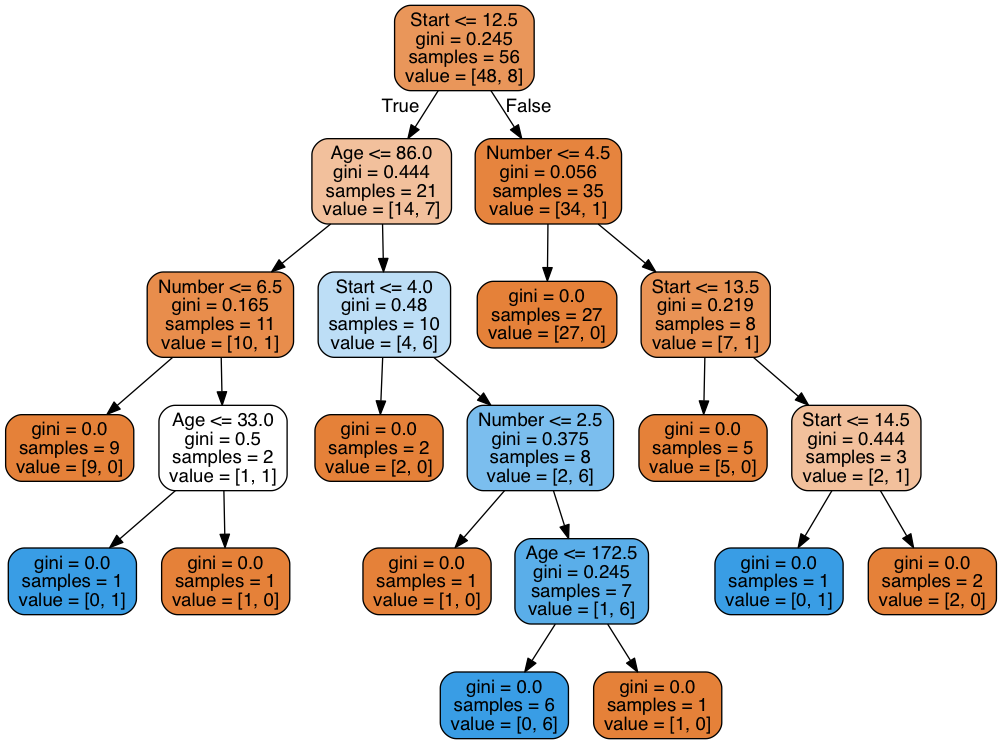

In [17]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## Random Forests

Jetzt können wir unseren Entscheidungsbaum mit einen Random Forest vergleichen:

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[15  1]
 [ 7  2]]


In [21]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

     absent       0.68      0.94      0.79        16
    present       0.67      0.22      0.33         9

avg / total       0.68      0.68      0.63        25



# Gut gemacht!